In [38]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [39]:

from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [40]:
from langgraph.graph.message import add_messages
#add messages is the reducer functions to add all the messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [41]:
llm = ChatOpenAI()


def chat_node(state : ChatState):
    #Take the user Query
    messages = state['messages']


    #Send the llm
    response = llm.invoke(messages)


    # Responde store State
    return {'messages':[response]}

In [42]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

#Add Nodes
graph.add_node('chat_node',chat_node)

#Add the Edge
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot = graph.compile(checkpointer = checkpointer)

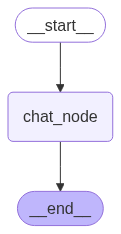

In [43]:
chatbot

In [44]:
thread_id  = '2'
config = {'configurable':{'thread_id':thread_id}}


initial_state = {
    'messages' : [HumanMessage(content = 'What is the Capitial of india')]
}

response = chatbot.invoke(initial_state,config = config)
last_message_content = response['messages'][-1].content

In [45]:
thread_id  = '1'

while True:
    user_query = input('TypeHere: ')

    if user_query.strip().lower() in ['exit','quit','bye']:
        break

    config = {'configurable':{'thread_id':thread_id}}

    response = chatbot.invoke({
    'messages' : [HumanMessage(content = user_query)]
        },config = config)

    print('AI:',response['messages'][-1].content)

AI: Hello! How can I help you today?
AI: Hello Sm1321! Nice to meet you. Is there anything specific you'd like to talk about or ask me?
AI: "Langgraph" does not appear to be a widely known term or concept. It may be a specific term used in a particular field or context. If you could provide more information or context, I would be happy to try to help further.
AI: IPL stands for the Indian Premier League, which is a professional Twenty20 cricket league in India. It is one of the most popular and competitive cricket leagues in the world.

The current captains for the Rajasthan Royals (RR) and Chennai Super Kings (CSK) teams in the IPL are as follows:
- Rajasthan Royals: Sanju Samson
- Chennai Super Kings: MS Dhoni
AI: Your name is Sm1321.
AI: You asked about the IPL (Indian Premier League) and the captains of the RR (Rajasthan Royals) and CSK (Chennai Super Kings) teams.
AI: The player who has scored the most centuries in international cricket is Sachin Tendulkar from India, with a total

In [46]:
chatbot.get_state(config = config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='d56235c0-703b-47ef-a12a-4cac4a014dd4'), AIMessage(content='Hello! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BxTqAsg8IIkW6lPl7uFRpfQiIBu19', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--36b2d5b1-35ec-46a4-b63e-06dd5b60d6b0-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='my name is Sm1